# Preparing dataset

The pandas dataframe is translated into a NumPy array, and split into 70% training, 30% testing.
The shapes are

Training
- X_train: (4922, 18)
- y_train: (4922,)

Testing
- X_test: (2110, 18)
- y_test: (2110,)

In [31]:
# libraries and reading csv

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn import tree # for plotting tree
from sklearn.tree import DecisionTreeClassifier # for building tree
from sklearn.model_selection import cross_val_score

from sklearn.metrics import RocCurveDisplay # for displaying roc curve

df = pd.read_csv('churn.csv') # (7032, 19)

All columns and their possible values

| column name | possible values | | column name | possible values | | column name | possible values |
|---|---|-|---|---|-|---|---|
| gender | 'Female', 'Male' | | InternetService | 'DSL', 'Fiber optic', 'No' | | StreamingMovies | 'Yes', 'No', 'No internet service' |
| SeniorCitizen | 0, 1 | | OnlineSecurity | 'Yes', 'No', 'No internet service' | | Contract | 'Month-to-month', 'One year', 'Two year' |
| Partner | 'Yes', 'No' | | OnlineBackup | 'Yes', 'No', 'No internet service' | | PaperlessBilling | 'Yes', 'No' |
| Dependents | 'Yes', 'No' | | DeviceProtection | 'Yes', 'No', 'No internet service' | | PaymentMethod | 'Electronic check' 'Mailed check' 'Bank transfer (automatic)', 'Credit card (automatic)' |
| tenure | integers | | TechSupport | 'Yes', 'No', 'No internet service' | | MonthlyCharges | floating point |
| PhoneService | 'Yes', 'No' | | StreamingTV | 'Yes', 'No', 'No internet service' | | Churn | 'Yes', 'No' |
| MultipleLines | 'No phone service', 'Yes', 'No' |



In [ ]:
# # confirm that there are no NaN values
# df.isna().any()
# # check what values each column can take
# for c in df.columns:
# 	print(df[c].unique())

In [32]:
def pandas_to_numpy(df):
	"""
	Converts the Pandas dataframe to a NumPy array
	"""
	ds = df.values # Pandas to NumPy
	# 0 gender, 2 Partner, 3 Dependents , 5 PhoneService, 6 MultipleLines
	ds[:, 0] = (ds[:, 0] != 'Male') * 1 # Male -> 0, Female -> 1 
	ds[:, [2, 3, 5]] = (ds[:, [2, 3, 5]] == 'Yes') * 1 # No -> 0, Yes -> 1
	ds[:, 6] = (ds[:, 6] == 'Yes') * 1
	ds[:, 6][ds[:, 5] == 0] = -1

	# 7 InternetService, 8 OnlineSecurity, 9 OnlineBackup, 10 DeviceProtection, 11 TechSupport, 12 StreamingTV, 13 StreamingMovies
	ds[:, 7][ds[:, 7] == "No"] = 0
	ds[:, 7][ds[:, 7] == "DSL"] = 1
	ds[:, 7][ds[:, 7] == "Fiber optic"] = 2
	ds[:, 8:14][ds[:, 8:14] == "No"] = 0
	ds[:, 8:14][ds[:, 8:14] == "Yes"] = 1
	ds[:, 8:14][ds[:, 8:14] == "No internet service"] = -1

	# 14 Contract, 15 PaperlessBilling, 16 PaymentMethod, 18 Churn
	ds[:, 14][ds[:, 14] == "Month-to-month"] = 0
	ds[:, 14][ds[:, 14] == "One year"] = 1
	ds[:, 14][ds[:, 14] == "Two year"] = 2
	ds[:, [15, 18]] = (ds[:, [15, 18]] == "Yes") * 1 # No -> 0, Yes -> 1
	ds[:, 16][ds[:, 16] == "Electronic check"] = 0
	ds[:, 16][ds[:, 16] == "Mailed check"] = 1
	ds[:, 16][ds[:, 16] == "Bank transfer (automatic)"] = 2
	ds[:, 16][ds[:, 16] == "Credit card (automatic)"] = 3

	return ds.astype(float)

In [33]:
# convert dataframe to NumPy array
ds = pandas_to_numpy(df) # ds = pandas_to_numpy(df)
# # check that the conversion didn't go wrong
# np.max(ds, axis=0), np.min(ds, axis=0)

In [35]:
# split testing and training (not used in the end because we used CV)
X_train, X_test, y_train, y_test = train_test_split(ds[:, 0:-1], ds[:, -1], test_size=0.3, random_state = 2211)

# Decision Tree

2.1 Building the basic tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state=2211)
model.fit(ds[:, 0:-1], ds[:, -1])

DecisionTreeClassifier(criterion='entropy', random_state=2211)

In [62]:
from sklearn.model_selection import cross_val_score
score_accuracy = cross_val_score(model, ds[:, 0:-1], ds[:, -1], scoring='accuracy', cv=10)
score_precision = cross_val_score(model, ds[:, 0:-1], ds[:, -1], scoring='precision', cv=10)
score_recall = cross_val_score(model, ds[:, 0:-1], ds[:, -1], scoring='recall', cv=10)
score_auc = cross_val_score(model, ds[:, 0:-1], ds[:, -1], scoring='roc_auc', cv=10)

0.7326478242596663

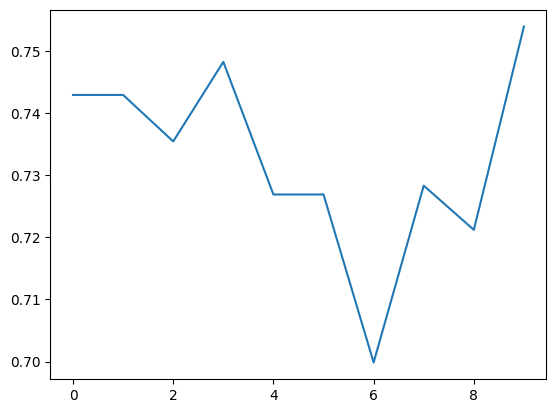

In [60]:
plt.plot(score_cv)
score_cv.mean()